In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from LR import LinearRegressor

# Exploratory Data Analysis (EDA)

#### Read Dataset

In [2]:
person = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv");

Improve dataset: Remove Gender column

In [3]:
person = person.drop(columns="Gender");

#### Dataset Summary

General image of dataset

In [4]:
display(person);

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3
...,...,...,...
495,150,153,5
496,184,121,4
497,141,136,5
498,150,95,5


Additional info about data

In [5]:
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  500 non-null    int64
 1   Weight  500 non-null    int64
 2   Index   500 non-null    int64
dtypes: int64(3)
memory usage: 11.8 KB


Various statistical info about data

In [6]:
person.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


Duplicate data in the dataset

In [7]:
display(person[person.duplicated()])
display(person.duplicated().sum())

,Height,Weight,Index
20,157,110,5
162,192,101,3
187,182,84,3
197,177,117,4
260,159,104,5
310,171,147,5
321,181,111,4
327,167,85,4
334,157,56,2
347,162,58,2


24

Plot the data with it's value count

array([[<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'Index'}>, <AxesSubplot:>]],
      dtype=object)

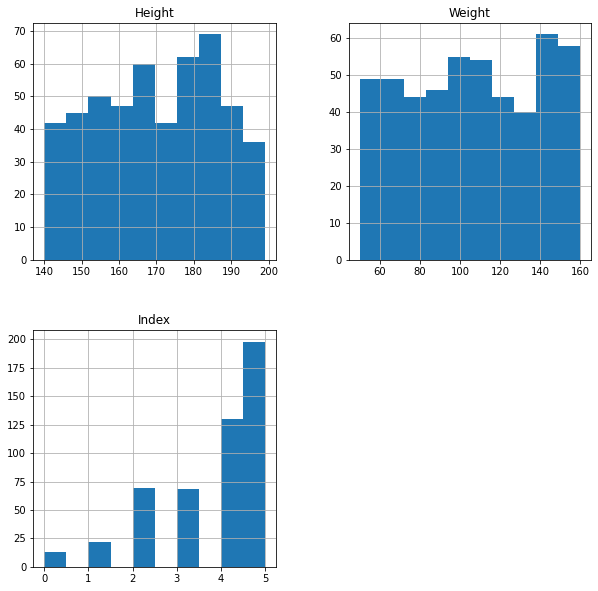

In [8]:
person.hist(figsize=(10,10))

In [9]:
display(person.isnull().sum(axis=0))

Height    0
Weight    0
Index     0
dtype: int64

#### Pair-plots for features

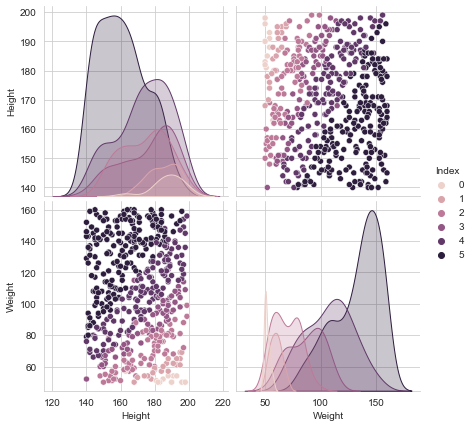

In [10]:
sns.set_style("whitegrid");
sns.pairplot(person, hue="Index", height=3);
plt.show();

# Train the regressor

Split dataset to train and test

In [11]:
X=person.values.tolist();
y=[];
for row in X:
    y.append(row[2]);
    del row[2];
X=pd.Series(X);
y=pd.Series(y);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True);

X_train_list=X_train.values.tolist();
y_train_list=y_train.values.tolist();
X_test_list=X_test.values.tolist();
y_test_list=y_test.values.tolist();

### Train The Regressor

In [12]:
iteration_count = 1000
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(iteration_count):
    # Model training
    regressor = LinearRegressor(learning_rate=0.000005, iterations=epoch + 1)
    regressor.fit(X_train_list, y_train_list)

    # Prediction on train set
    y_train_pred = regressor.predict(X_train_list)
    # Prediction on test set
    y_test_pred = regressor.predict(X_test_list)

    # Loss for train
    mse_train = mean_squared_error(y_train_list, y_train_pred)
    train_losses.append(mse_train)
    # Loss for test
    mse_test = mean_squared_error(y_test_list, y_test_pred)
    test_losses.append(mse_test)

    # Accuracy for train
    r2_train = r2_score(y_train_list, y_train_pred)
    train_accuracies.append(r2_train)
    # Accuracy for test
    r2_test = r2_score(y_test_list, y_test_pred)
    test_accuracies.append(r2_test)


### Show last predictions

In [13]:
print("Train Features Expected Regression")
print(y_train_list)
print("Prediction")
print(y_train_pred);

print("Test Features Expected Regression")
print(y_test_list)
print("Prediction")
print(y_test_pred);

Train Features Expected Regression
[5, 4, 4, 5, 5, 5, 1, 4, 4, 5, 0, 5, 4, 2, 4, 4, 5, 5, 5, 5, 3, 4, 1, 5, 5, 4, 2, 3, 5, 5, 2, 0, 5, 4, 5, 5, 2, 4, 5, 5, 3, 3, 2, 5, 4, 3, 5, 0, 5, 3, 3, 4, 5, 4, 2, 5, 0, 4, 3, 1, 5, 5, 1, 3, 3, 2, 5, 1, 5, 5, 4, 5, 2, 5, 5, 4, 5, 5, 5, 3, 1, 5, 3, 4, 5, 5, 4, 2, 5, 5, 5, 5, 5, 3, 4, 1, 4, 5, 3, 3, 3, 3, 2, 2, 4, 5, 4, 5, 5, 4, 4, 1, 1, 3, 5, 5, 4, 5, 5, 4, 5, 5, 2, 2, 5, 2, 5, 5, 5, 5, 4, 2, 4, 4, 2, 5, 1, 5, 4, 4, 4, 2, 3, 2, 4, 5, 3, 3, 4, 5, 5, 5, 5, 5, 5, 4, 2, 4, 2, 4, 2, 5, 4, 5, 2, 2, 5, 5, 5, 4, 1, 1, 5, 5, 5, 4, 5, 1, 5, 3, 5, 5, 4, 5, 2, 4, 5, 3, 5, 5, 2, 5, 5, 1, 3, 5, 4, 5, 3, 5, 2, 1, 2, 2, 4, 5, 2, 4, 5, 4, 5, 5, 2, 4, 5, 4, 4, 5, 4, 3, 3, 5, 3, 4, 5, 5, 3, 0, 5, 3, 5, 5, 5, 3, 3, 4, 5, 5, 4, 5, 4, 5, 4, 5, 4, 4, 5, 0, 4, 3]
Prediction
[5.119551973985626, 3.916733063130086, 3.8028071636219596, 5.598460223683045, 4.387415566408019, 5.787741731794924, 1.7342912404257567, 2.567472001082508, 2.965669722561193, 3.7210107818037153, 1.5721710

# Results

### Loss (MSE)

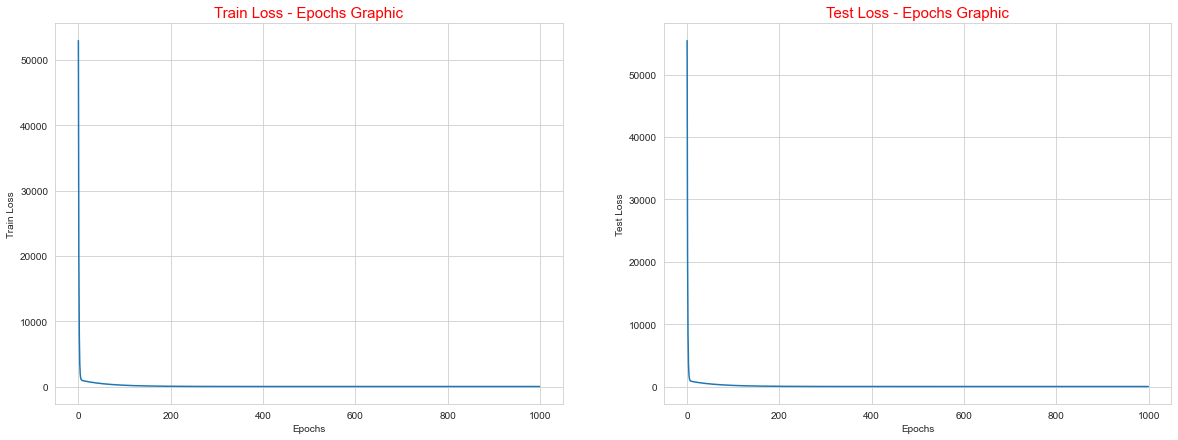

Final Train Loss:  0.7165192206963923
Final Test Loss:  0.5630813798212704


In [14]:
epochs = np.arange(0, iteration_count)

#plt.rcParams['figure.figsize'] = [30/2.54, 24/2.54]

plt.subplots(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses)
plt.title("Train Loss - Epochs Graphic", fontsize = 15, color="r")
plt.xlabel("Epochs")
plt.ylabel("Train Loss")

plt.subplot(1, 2, 2)
plt.plot(epochs, test_losses)
plt.title("Test Loss - Epochs Graphic", fontsize = 15, color="r")
plt.xlabel("Epochs")
plt.ylabel("Test Loss")

plt.show()

print("Final Train Loss: ", train_losses[iteration_count-1])
print("Final Test Loss: ", test_losses[iteration_count-1])

### Accuracy (R^2)

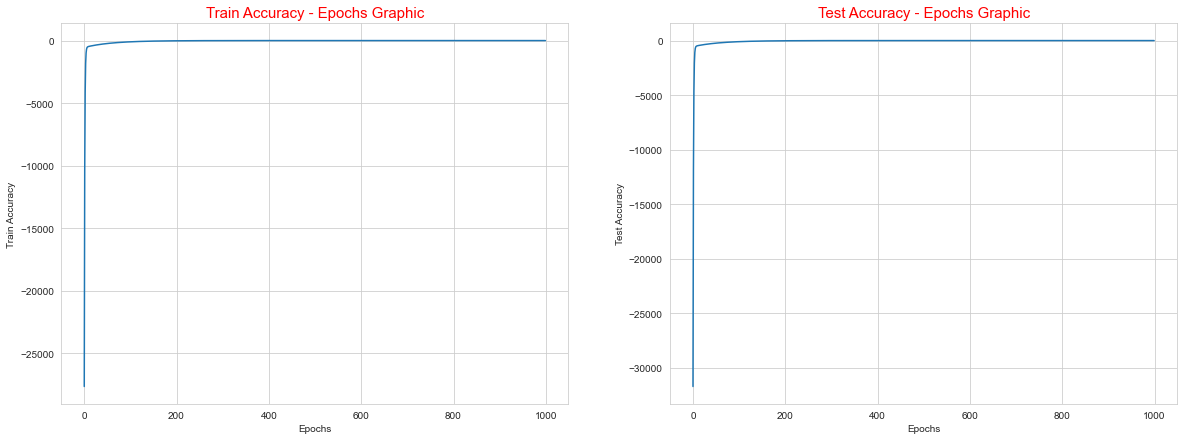

Final Train Accuracy Score:  0.6259557210814406
Final Test Accuracy Score:  0.6777501282968492


In [15]:
plt.subplots(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies)
plt.title("Train Accuracy - Epochs Graphic", fontsize = 15, color="r")
plt.xlabel("Epochs")
plt.ylabel("Train Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs, test_accuracies)
plt.title("Test Accuracy - Epochs Graphic", fontsize = 15, color="r")
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy")

plt.show()

print("Final Train Accuracy Score: ", train_accuracies[iteration_count-1])
print("Final Test Accuracy Score: ", test_accuracies[iteration_count-1])

#### Observations:

- I used MSE as a Loss function and Rsquare as an Accuracy metric.
- As we see above graphics, as the epochs count increase, Accuracy is increasing and Loss is decreasing, in other words, it is approaching 0.
- I noticed that there is an inverse relationship between learning rate and epoch. Learning rate needs to be small, and epoch needs to be large.